# Process *p datafile

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import functools
import os
import warnings

## Collect occupation of individual

First, I combine all data point from Data from individual questionnaire 1984 to 2018

In [9]:
#Variable used for each dataset
soep_info = pd.read_csv("data\soep_info.csv")

In [10]:
#read all files in folder data\soep
folder = os.chdir("data\soep")
extension = 'csv'
all_filecsv = [i for i in glob.glob('*.{}'.format(extension))]
all_filename = [s.rstrip('.csv') for s in all_filecsv]

#read variables for each year
varset = [[] for _ in range(35)]
for i, data in enumerate(all_filename):
    sub = soep_info[soep_info['dataset'] == data]
    varset[i] = sub['variable'].tolist()
    varset[i].append('pid')

In [11]:
all_filename

['ap',
 'bap',
 'bbp',
 'bcp',
 'bdp',
 'bep',
 'bfp',
 'bgp',
 'bhp',
 'bip',
 'bp',
 'cp',
 'dp',
 'ep',
 'fp',
 'gp',
 'hp',
 'ip',
 'jp',
 'kp',
 'lp',
 'mp',
 'np',
 'op',
 'pp',
 'qp',
 'rp',
 'sp',
 'tp',
 'up',
 'vp',
 'wp',
 'xp',
 'yp',
 'zp']

In [4]:
#combine all files in the list
wide_soep = pd.concat([pd.read_csv(f, usecols= varset[i]).set_index('pid').stack() for i ,f in enumerate(all_filecsv)], axis=0).unstack()

***

## Merge all dataset to wide format

Now I have the wide format of dataset

In [6]:
wide_soep.reset_index(inplace=True)
wide_soep

,pid,ap08,ap2801,ap2802,ap2804,ap2805,ap2905,ap2906,bap06,bap3801,...,yp15,yp4601,yp4602,yp4604,yp4605,zp06,zp4201,zp4202,zp4204,zp4205
0,101,1.0,-2.0,-2.0,4.0,-2.0,-2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102,7.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,1.0,-2.0,-2.0,3.0,-2.0,1.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201,7.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,NaN,NaN,...,2.0,-2.0,-2.0,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN
4,202,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94733,39237901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94734,39238001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94735,39238002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94736,39238301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next I convert from wide format to long format

In [7]:
# Create dictionary to rename columns to readable names
soep_info['readable_name_year'] = soep_info['variables_name'] + soep_info['survey_year']
readable_name_year = dict(zip(soep_info.variable, soep_info.readable_name_year))
readable_name_year

{'cid': 'origin_hh_noinvariant',
 'pid': 'person_idinvariant',
 'ap2801': 'blue_collar1984',
 'ap2802': 'self_employment1984',
 'ap2804': 'white_collar1984',
 'ap2805': 'civil_servant1984',
 'ap2905': 'vocation_training1984',
 'ap2906': 'college1984',
 'ap08': 'unemployment_status1984',
 'bp09': 'unemployment_status1985',
 'cp05': 'unemployment_status1986',
 'dp05': 'unemployment_status1987',
 'ep05': 'unemployment_status1988',
 'fp06': 'unemployment_status1989',
 'gp09': 'unemployment_status1990',
 'hp07': 'unemployment_status1991',
 'ip09': 'unemployment_status1992',
 'jp09': 'unemployment_status1993',
 'kp16': 'unemployment_status1994',
 'lp13': 'unemployment_status1995',
 'mp12': 'unemployment_status1996',
 'np08': 'unemployment_status1997',
 'op04': 'unemployment_status1998',
 'pp05': 'unemployment_status1999',
 'qp04': 'unemployment_status2000',
 'rp09': 'unemployment_status2001',
 'sp10': 'unemployment_status2002',
 'tp13': 'unemployment_status2003',
 'up05': 'unemployment_statu

In [8]:
wide_soep.rename(columns = readable_name_year, inplace = True)
wide_soep = wide_soep.rename(columns={"origin_hh_noinvariant": "origin_hh_no",
                                    "person_idinvariant": "person_id"}) #rename the colums

In [9]:
# List of unique readable names 
readable_names_unique = soep_info['variables_name'].unique().tolist()[2:]
# Convert wide to long format
long_soep = pd.wide_to_long(wide_soep, readable_names_unique, i = "person_id", j="year")
#long_soep

In [18]:
#long_soep.to_csv('long_soep.csv')
wide_soep.to_csv('wide_soep.csv')

***

## Merge with family background dataset

Merge individual occupation with `bioparen` and `ppathl` to collect info on family background

In [2]:
long_soep = pd.read_csv('data\long_soep.csv')
#wide_soep = pd.read_csv('data\wide_soep.csv')

In [3]:
ppathl =  pd.read_csv("data/ppathl.csv", usecols=['pid','syear','gebjahr','sex','erstbefr','letztbef','immiyear','germborn','migback','phrf'])
ppathl.rename(columns={'pid':"person_id",'syear':'year'},inplace=True)

In [4]:
ppathl_long = pd.merge(ppathl,long_soep,
                   on = ['person_id','year'],
                   how ='inner'
                  )
print("Ppathl_long:" + str(ppathl_long.shape))

Ppathl_long:(422856, 17)


In [5]:
#Merge with bioparen
bioparen = pd.read_csv("data/bioparen.csv", usecols=['pid','fsedu','msedu','locchildh','fprofstat','mprofstat','morigin','forigin','fprofedu','mprofedu'])
bioparen.rename(columns={'pid':"person_id"},inplace=True)
ppathl_paren_long = pd.merge(ppathl_long, bioparen,
                   on = 'person_id',
                   how ='inner'
                  )

In [6]:
#create info of individual age at survey year
ppathl_paren_long['bioage'] = ppathl_paren_long['year'] - ppathl_paren_long['gebjahr']

In [7]:
warnings.filterwarnings("ignore")
# drop observations which year of data point > the last year of survey & year < first year of survey
ppathl_paren_long.drop(ppathl_paren_long[ppathl_paren_long.year > ppathl_paren_long.letztbef].index,inplace=True)
ppathl_paren_long.drop(ppathl_paren_long[ppathl_paren_long.year < ppathl_paren_long.erstbefr].index,inplace=True)

In [9]:
#ppathl_paren_long.to_csv('ppathl_paren_long.csv')

***

In [2]:
ppathl_paren_long = pd.read_csv('data\ppathl_paren_long.csv')
ppathl_paren_long

,person_id,year,sex,gebjahr,erstbefr,letztbef,immiyear,germborn,migback,phrf,...,college,unemployment_status,fsedu,msedu,locchildh,fprofstat,mprofstat,morigin,forigin,bioage
0,101,1984,1,1930,1984,1989,-2,1,1,5020.66,...,1.0,1.0,0,0,4,1,-5,-2,-2,54
1,101,1985,1,1930,1984,1989,-2,1,1,5068.29,...,-2.0,2.0,0,0,4,1,-5,-2,-2,55
2,101,1986,1,1930,1984,1989,-2,1,1,5137.46,...,-2.0,2.0,0,0,4,1,-5,-2,-2,56
3,101,1987,1,1930,1984,1989,-2,1,1,5511.95,...,-2.0,2.0,0,0,4,1,-5,-2,-2,57
4,101,1988,1,1930,1984,1989,-2,1,1,9068.37,...,-2.0,2.0,0,0,4,1,-5,-2,-2,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334526,2813701,2009,1,1949,2000,2013,-2,1,1,2343.41,...,NaN,2.0,1,1,2,520,210,-2,-2,60
334527,2813701,2010,1,1949,2000,2013,-2,1,1,2126.83,...,NaN,2.0,1,1,2,520,210,-2,-2,61
334528,2813701,2011,1,1949,2000,2013,-2,1,1,1715.63,...,NaN,2.0,1,1,2,520,210,-2,-2,62
334529,2813701,2012,1,1949,2000,2013,-2,1,1,1768.14,...,NaN,2.0,1,1,2,520,210,-2,-2,63


In [4]:
ppathl_paren_long.dtypes

person_id                int64
year                     int64
sex                      int64
gebjahr                  int64
erstbefr                 int64
letztbef                 int64
immiyear                 int64
germborn                 int64
migback                  int64
phrf                   float64
blue_collar            float64
self_employment        float64
white_collar           float64
civil_servant          float64
vocation_training      float64
college                float64
unemployment_status    float64
fsedu                    int64
msedu                    int64
locchildh                int64
fprofstat                int64
mprofstat                int64
morigin                  int64
forigin                  int64
bioage                   int64
dtype: object

In [3]:
# Data of 2nd generation of immigrant and native German
immig_nat_long = ppathl_paren_long[ppathl_paren_long['migback'].isin([3,1])]
immig_nat_long.shape

(272399, 25)

In [6]:
# immigrant
immig_long = ppathl_paren_long[ppathl_paren_long['migback']==3]
#native
nat_long = ppathl_paren_long[ppathl_paren_long['migback']==1]

In [12]:
firstgen_immig =  ppathl_paren_long[ppathl_paren_long['migback']==2]

In [7]:
forigin_group = pd.read_csv('data/forigin.csv')

In [8]:
warnings.filterwarnings("ignore")
# dictionary
dict_forigin = {row['value'] : row['group'] for i, row in forigin_group.iterrows()}

#Then replace categorical variables in dataset
immig_long['forigin_group'] = immig_long['forigin'].replace(to_replace=dict_forigin.keys(), value=dict_forigin.values())

In [14]:
#grouping 2gen of immigrant based on father origin
immig_long['forigin_group'].value_counts()

Turkey            3509
Does not apply    3095
Italy             2179
Former Yugo       1838
Germany           1789
Greece            1477
Spain              705
Others             439
EU                 355
Poland             210
African            122
USA                103
invalid             76
Eastern Europe      68
Russia              43
Middle East          9
Portugal             4
Name: forigin_group, dtype: int64

In [35]:
immig_long.shape

(16021, 26)

In [7]:
mean_age_immig = immig_long.groupby(['forigin_group']).apply(lambda x: pd.Series(np.average(x[["bioage"]],
                                             weights=x["phrf"], axis=0),index=['age']))
mean_age_immig

,age
forigin_group,
African,26.113929
Does not apply,41.112388
EU,28.661597
Eastern Europe,24.403864
Former Yugo,26.585755
Germany,26.946834
Greece,28.671363
Italy,27.048386
Middle East,22.230067


In [ ]:
mean_age_nat = nat_long.groupby(['forigin_group']).apply(lambda x: pd.Series(np.average(x[["bioage"]],
                                             weights=x["phrf"], axis=0),index=['age']))
mean_age_nat

In [36]:
immig_1990_2010 = immig_long[immig_long['year'].isin([1990,2000,2010])]

In [47]:
df = immig_1990_2010[['person_id','year','sex','bioage','blue_collar','white_collar','self_employment','civil_servant','unemployment_status','phrf']]
df['blue_collar'] = np.where(df['blue_collar']>0,1,0)
df['white_collar'] = np.where(df['white_collar']>0,1,0)
df['self_employment'] = np.where(df['self_employment']>0,1,0)
df['civil_servant'] = np.where(df['civil_servant']>0,1,0)

In [63]:
index= ['blue_collar','white_collar','self_employment','civil_servant']
group = df.groupby(["year"])
job_immig = group.apply(lambda x: pd.Series(np.average(x[index],weights=x["phrf"],axis=0),index))

In [64]:
job_immig

,blue_collar,white_collar,self_employment,civil_servant
year,,,,
1990,0.172737,0.172314,0.026677,0.000000
2000,0.182556,0.237540,0.031897,0.005662
2010,0.160769,0.347460,0.014298,0.013867


In [13]:
firstgen_immig_1990_2000 = firstgen_immig[firstgen_immig['year'].isin([1990,2000,2010])]

In [14]:
df = firstgen_immig_1990_2000[['person_id','year','sex','bioage','blue_collar','white_collar','self_employment','civil_servant','unemployment_status','phrf']]
df['blue_collar'] = np.where(df['blue_collar']>0,1,0)
df['white_collar'] = np.where(df['white_collar']>0,1,0)
df['self_employment'] = np.where(df['self_employment']>0,1,0)
df['civil_servant'] = np.where(df['civil_servant']>0,1,0)

In [15]:
index= ['blue_collar','white_collar','self_employment','civil_servant']
group = df.groupby(["year"])
job_1immig = group.apply(lambda x: pd.Series(np.average(x[index],weights=x["phrf"],axis=0),index))
job_1immig

,blue_collar,white_collar,self_employment,civil_servant
year,,,,
1990,0.388236,0.139025,0.035830,0.007205
2000,0.325467,0.156128,0.036323,0.010940
2010,0.254608,0.174848,0.037445,0.006638


In [48]:
#short_immig[['fsedu','msedu','locchildh','forigin','fprofstat','mprofstat']]

In [66]:
nat_1990_2010 = nat_long[nat_long['year'].isin([1990,2000,2010])]

In [67]:
df = nat_1990_2010[['person_id','year','sex','bioage','blue_collar','white_collar','self_employment','civil_servant','unemployment_status','phrf']]
df['blue_collar'] = np.where(df['blue_collar']>0,1,0)
df['white_collar'] = np.where(df['white_collar']>0,1,0)
df['self_employment'] = np.where(df['self_employment']>0,1,0)
df['civil_servant'] = np.where(df['civil_servant']>0,1,0)

In [68]:
index= ['blue_collar','white_collar','self_employment','civil_servant']
group = df.groupby(["year"])
job_nat = group.apply(lambda x: pd.Series(np.average(x[index],weights=x["phrf"],axis=0),index))

In [69]:
job_nat

,blue_collar,white_collar,self_employment,civil_servant
year,,,,
1990,0.169981,0.246767,0.050483,0.052555
2000,0.131886,0.284442,0.061412,0.043709
2010,0.129509,0.282536,0.054412,0.042471


In [71]:
immig_heatmap = immig_long.drop(immig_long[immig_long['forigin_group'].isin(['Does not apply','invalid'])].index)

In [72]:
immig_heatmap

,person_id,year,sex,gebjahr,erstbefr,letztbef,immiyear,germborn,migback,phrf,...,unemployment_status,fsedu,msedu,locchildh,fprofstat,mprofstat,morigin,forigin,bioage,forigin_group
479,1705,2002,2,1985,2002,2007,-2,1,3,328.34,...,2.0,4,2,1,540,620,1,20,17,Others
480,1705,2003,2,1985,2002,2007,-2,1,3,313.57,...,2.0,4,2,1,540,620,1,20,18,Others
481,1705,2004,2,1985,2002,2007,-2,1,3,308.77,...,2.0,4,2,1,540,620,1,20,19,Others
482,1705,2005,2,1985,2002,2007,-2,1,3,336.05,...,2.0,4,2,1,540,620,1,20,20,Others
483,1705,2006,2,1985,2002,2007,-2,1,3,380.77,...,2.0,4,2,1,540,620,1,20,21,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418579,2812903,2016,2,1996,2013,2017,-2,1,3,6057.37,...,2.0,3,2,4,510,530,1,1,20,Germany
418580,2812903,2017,2,1996,2013,2017,-2,1,3,8411.43,...,2.0,3,2,4,510,530,1,1,21,Germany
418598,2812904,2016,2,1999,2016,2018,-2,1,3,2083.00,...,NaN,1,2,4,522,522,1,1,17,Germany
418599,2812904,2017,2,1999,2016,2018,-2,1,3,1885.61,...,2.0,1,2,4,522,522,1,1,18,Germany


In [73]:
immig_heatmap['blue_collar_w'] = np.where(immig_heatmap['blue_collar']>0,immig_heatmap['phrf'],0)
immig_heatmap['white_collar_w'] = np.where(immig_heatmap['white_collar']>0,immig_heatmap['phrf'],0)
immig_heatmap['self_employment_w'] = np.where(immig_heatmap['self_employment']>0,immig_heatmap['phrf'],0)
immig_heatmap['civil_servant_w'] = np.where(immig_heatmap['civil_servant']>0,immig_heatmap['phrf'],0)

In [76]:
table_heatmap = pd.pivot_table(immig_heatmap, values=['blue_collar_w', 'white_collar_w','self_employment_w','civil_servant_w'], index='forigin_group',
                    aggfunc={'blue_collar_w': np.sum, 'white_collar_w': np.sum, 'self_employment_w': np.sum,'civil_servant_w': np.sum})

In [77]:
table_heatmap

,blue_collar_w,civil_servant_w,self_employment_w,white_collar_w
forigin_group,,,,
African,58864.71,7571.23,3160.54,22636.28
EU,166648.73,20479.59,10589.42,463998.59
Eastern Europe,43832.24,0.00,0.00,58281.19
Former Yugo,732786.06,16398.88,107364.35,954182.62
Germany,849567.86,297822.34,84519.16,1615770.61
Greece,300466.89,9549.38,105627.74,580126.97
Italy,896339.25,77133.18,106810.51,1147467.26
Middle East,0.00,0.00,0.00,0.00
Others,171361.28,56984.63,34703.58,591874.11


Text(0.5, 1.0, 'Heatmap of Occupational choice vs Father origion')

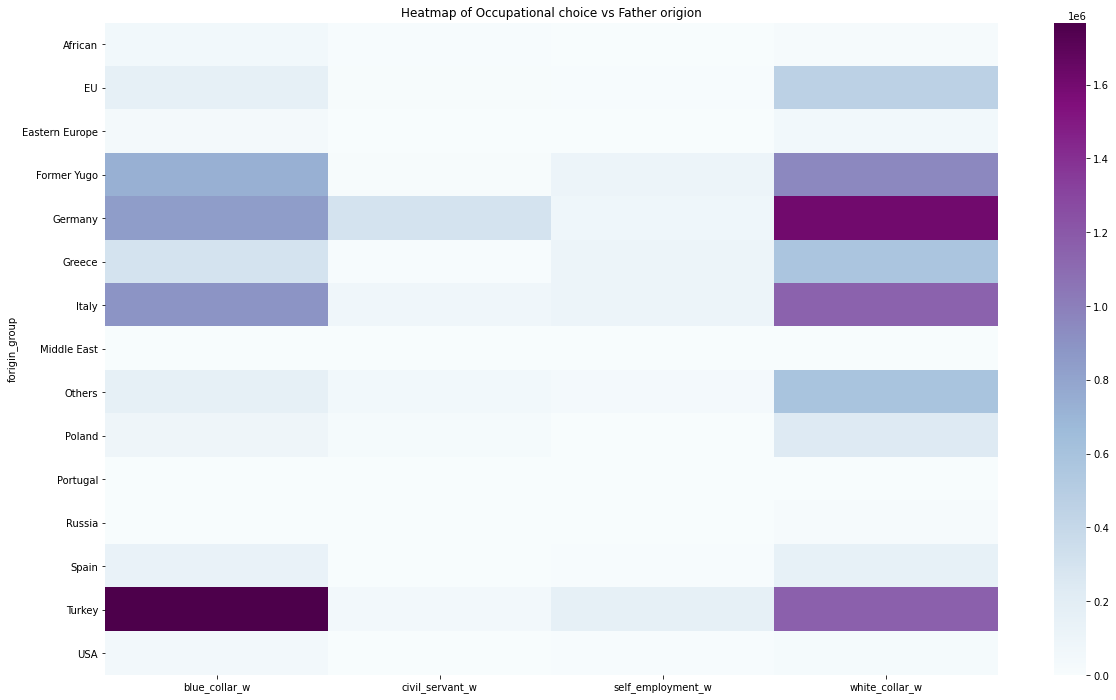

In [84]:
fig = plt.figure(figsize=(20,12))
r = sns.heatmap(table_heatmap, cmap='BuPu')
r.set_title("Heatmap of Occupational choice vs Father origion")

In [ ]:
plj0078